## Spaceship Titanic Made Easy 🚢👽
The goals of this notebook is to make this data and this competition easy for you.
___

**Description:**

Welcome to the year 2912, where your data science skills are needed to solve a cosmic mystery. We've received a transmission from four lightyears away and things aren't looking good.

The Spaceship Titanic was an interstellar passenger liner launched a month ago. With almost 13,000 passengers on board, the vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.

While rounding Alpha Centauri en route to its first destination—the torrid 55 Cancri E—the unwary Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. Sadly, it met a similar fate as its namesake from 1000 years before. Though the ship stayed intact, almost half of the passengers were transported to an alternate dimension!

To help rescue crews and retrieve the lost passengers, you are challenged to predict which passengers were transported by the anomaly using records recovered from the spaceship’s damaged computer system.

Help save them and change history!
___

# 1.Importing Libraries 😀

In [1]:
# 설치 수행
# conda install -c conda-forge xgboost
# pip install catboost

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

- numpy: 수학적인 계산을 위한 파이썬 라이브러리
- pandas: 데이터 조작과 분석을 위한 파이썬 라이브러리로, 데이터를 효율적으로 다룰 수 있도록 도와줌
- matplotlib.pyplot: 시각화를 위한 라이브러리입니다. 여기에서는 plt로 별칭을 지정
- %matplotlib inline: Jupyter Notebook 등에서 matplotlib 그래프를 출력할 때, 그래프를 인라인으로 출력하도록 설정하는 명령어

In [63]:
import seaborn as sns
sns.set(style='darkgrid', font_scale=2)

- seaborn: matplotlib 기반의 높은 수준의 시각화 라이브러리입니다. sns로 별칭을 지정
- sns.set(style='darkgrid', font_scale=2): seaborn의 스타일을 지정하는 함수

In [64]:
import warnings
warnings.filterwarnings('ignore')

- warnings: 경고 메시지를 관리하는 파이썬 기본 라이브러리
- warnings.filterwarnings('ignore'): 경고 메시지를 무시하도록 설정

In [65]:
# Sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

- sklearn: scikit-learn은 머신 러닝을 위한 파이썬 라이브러리로, 다양한 머신 러닝 알고리즘과 유틸리티 함수를 제공합니다.
- train_test_split: 데이터를 학습용과 테스트용으로 분할하는 함수입니다.
- accuracy_score: 예측 결과의 정확도를 계산하기 위한 함수입니다.
- LabelEncoder: 문자열 형태의 레이블을 숫자로 인코딩하는데 사용되는 클래스입니다.

In [66]:
# Models
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

- XGBClassifier: XGBoost(Extreme Gradient Boosting) 알고리즘을 사용하는 분류 모델 클래스입니다.
- CatBoostClassifier: CatBoost 알고리즘을 사용하는 분류 모델 클래스입니다.

# 2- Loading the Data 📅

In [68]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/train.csv')

df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


**Columns Description**
- PassengerId(승객ID) - 각 승객에게 할당된 고유한 식별자입니다. 형식은 gggg_pp로, gggg는 승객이 함께 여행하는 그룹을 나타내고 pp는 그 그룹 내에서의 번호를 나타냅니다. 그룹 내의 사람들은 가족 구성원인 경우도 있지만 항상 그렇지는 않습니다.
- HomePlanet(고향 행성) - 승객이 출발한 행성으로, 일반적으로 영구 거주지인 행성입니다.
- CryoSleep(수면 냉동) - 승객이 항해 기간 동안 냉동 수면에 들 것인지를 나타냅니다. 수면 냉동을 선택한 승객들은 자신들의 객실에 제한되어 있습니다.
- Cabin(객실) - 승객이 머무는 객실 번호입니다. 형식은 deck/num/side로, side는 포트(Port) 또는 스타보드(Starboard)를 나타냅니다.
- Destination(목적지) - 승객이 하차할 행성입니다.
- Age(나이) - 승객의 나이입니다.
- VIP(VIP) - 승객이 항해 동안 특별한 VIP 서비스를 지불했는지를 나타냅니다.
- RoomService(룸 서비스), FoodCourt(음식점), ShoppingMall(쇼핑몰), Spa(스파), VRDeck(가상현실 데크) - 각각 Spaceship Titanic의 여러 고급 편의시설에서 승객이 청구한 금액을 나타냅니다.
- Name(이름) - 승객의 이름(이름과 성)입니다.
- Transported(이동 여부) - 승객이 다른 차원으로 이동했는지 여부를 나타내는 값입니다. 이 값은 예측하려는 목표 변수, 즉 예측하려는 열입니다.

# 3- Let's Explore 👓

In [69]:
r1,c1 = df_train.shape
print('The training data has {} rows and {} columns'.format(r1,c1))
r2,c2 = df_test.shape
print('The validation data has {} rows and {} columns'.format(r2,c2))

The training data has 8693 rows and 14 columns
The validation data has 8693 rows and 14 columns


In [70]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [71]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [72]:
df_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [73]:
df_test.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


### 3.B Missing values 🤔

In [74]:
# To see the quantity of null vaues in all the columns.
# c1 stands for the number of columns in the training data.


print('MISSING VALUES IN TRAINING DATASET:')
print(df_train.isna().sum().nlargest(c1))
print('')
print('MISSING VALUES IN VALIDATION DATASET:')
print(df_test.isna().sum().nlargest(c2))

MISSING VALUES IN TRAINING DATASET:
CryoSleep       217
ShoppingMall    208
VIP             203
HomePlanet      201
Name            200
Cabin           199
VRDeck          188
FoodCourt       183
Spa             183
Destination     182
RoomService     181
Age             179
PassengerId       0
Transported       0
dtype: int64

MISSING VALUES IN VALIDATION DATASET:
CryoSleep       217
ShoppingMall    208
VIP             203
HomePlanet      201
Name            200
Cabin           199
VRDeck          188
FoodCourt       183
Spa             183
Destination     182
RoomService     181
Age             179
PassengerId       0
Transported       0
dtype: int64


In [75]:
df_train.set_index('PassengerId',inplace=True)
df_test.set_index('PassengerId',inplace=True)

### 3.C Null Replacement 🤩

In [77]:
# 이 코드는 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck' 열에 대해서 NaN 값을 0으로 채움
# 이러한 열은 승객들이 각 고급 편의시설에서 청구한 금액을 나타내며, 결측치가 있는 경우 해당 시설을 이용하지 않았다고 가정하여 0으로 채우는 것
df_train[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']] = df_train[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].fillna(0)
df_test[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']] = df_test[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].fillna(0)


# 'Age' 열에 대해서는 결측치를 해당 열의 중간값(median)으로 채우는 작업을 수행
# 이는 나이 정보를 결측치가 있는 승객들의 평균적인 나이로 대체하기 위함
df_train['Age'] =df_train['Age'].fillna(df_train['Age'].median())
df_test['Age'] =df_test['Age'].fillna(df_test['Age'].median())


# 'VIP' 열은 승객이 VIP 서비스를 지불했는지 여부를 나타내는 열
# 결측치가 있는 경우 해당 승객은 VIP 서비스를 이용하지 않았다고 가정하여 False로 채움
df_train['VIP'] =df_train['VIP'].fillna(False)
df_test['VIP'] =df_test['VIP'].fillna(False)


# 'HomePlanet' 열은 승객이 출발한 행성을 나타내는 열
# 결측치가 있는 경우 해당 승객의 행성을 'Mars'로 대체
df_train['HomePlanet'] =df_train['HomePlanet'].fillna('Mars')
df_test['HomePlanet'] =df_test['HomePlanet'].fillna('Mars')


# 'Destination' 열은 승객이 하차할 행성을 나타내는 열
# 결측치가 있는 경우 해당 승객의 하차 행성을 "PSO J318.5-22"로 대체
df_train['Destination']=df_train['Destination'].fillna("PSO J318.5-22")
df_test['Destination']=df_test['Destination'].fillna("PSO J318.5-22")


# 'CryoSleep' 열은 승객이 냉동 수면에 들었는지 여부를 나타내는 열
# 결측치가 있는 경우 해당 승객은 냉동 수면에 들지 않았다고 가정하여 False로 채움
df_train['CryoSleep'] =df_train['CryoSleep'].fillna(False)
df_test['CryoSleep'] =df_test['CryoSleep'].fillna(False)


# 'Cabin' 열은 승객이 머무는 객실 번호를 나타내는 열
# 결측치가 있는 경우 해당 승객의 객실 번호를 'T/0/P'로 대체
df_train['Cabin'] =df_train['Cabin'].fillna('T/0/P')
df_test['Cabin'] =df_test['Cabin'].fillna('T/0/P')

# 4.Exploration and Visualization 🤠

In [13]:
# 오류 발생  https://stackoverflow.com/questions/76533178/python-corr-valueerror-could-not-convert-string-to-float
# df_train.corr()  # 오류
df_train.corr(numeric_only=True) 

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
CryoSleep,1.000000,-0.071323,-0.078281,-0.244089,-0.205928,-0.207798,-0.198307,-0.192721,0.460132
Age,-0.071323,1.000000,0.091863,0.068629,0.127390,0.033148,0.120946,0.099590,-0.074233
VIP,-0.078281,0.091863,1.000000,0.056566,0.125499,0.018412,0.060991,0.123061,-0.037261
RoomService,-0.244089,0.068629,0.056566,1.000000,-0.015126,0.052337,0.009244,-0.018624,-0.241124
FoodCourt,-0.205928,0.127390,0.125499,-0.015126,1.000000,-0.013717,0.221468,0.224572,0.045583
ShoppingMall,-0.207798,0.033148,0.018412,0.052337,-0.013717,1.000000,0.014542,-0.007849,0.009391
Spa,-0.198307,0.120946,0.060991,0.009244,0.221468,0.014542,1.000000,0.147658,-0.218545
VRDeck,-0.192721,0.099590,0.123061,-0.018624,0.224572,-0.007849,0.147658,1.000000,-0.204874
Transported,0.460132,-0.074233,-0.037261,-0.241124,0.045583,0.009391,-0.218545,-0.204874,1.000000


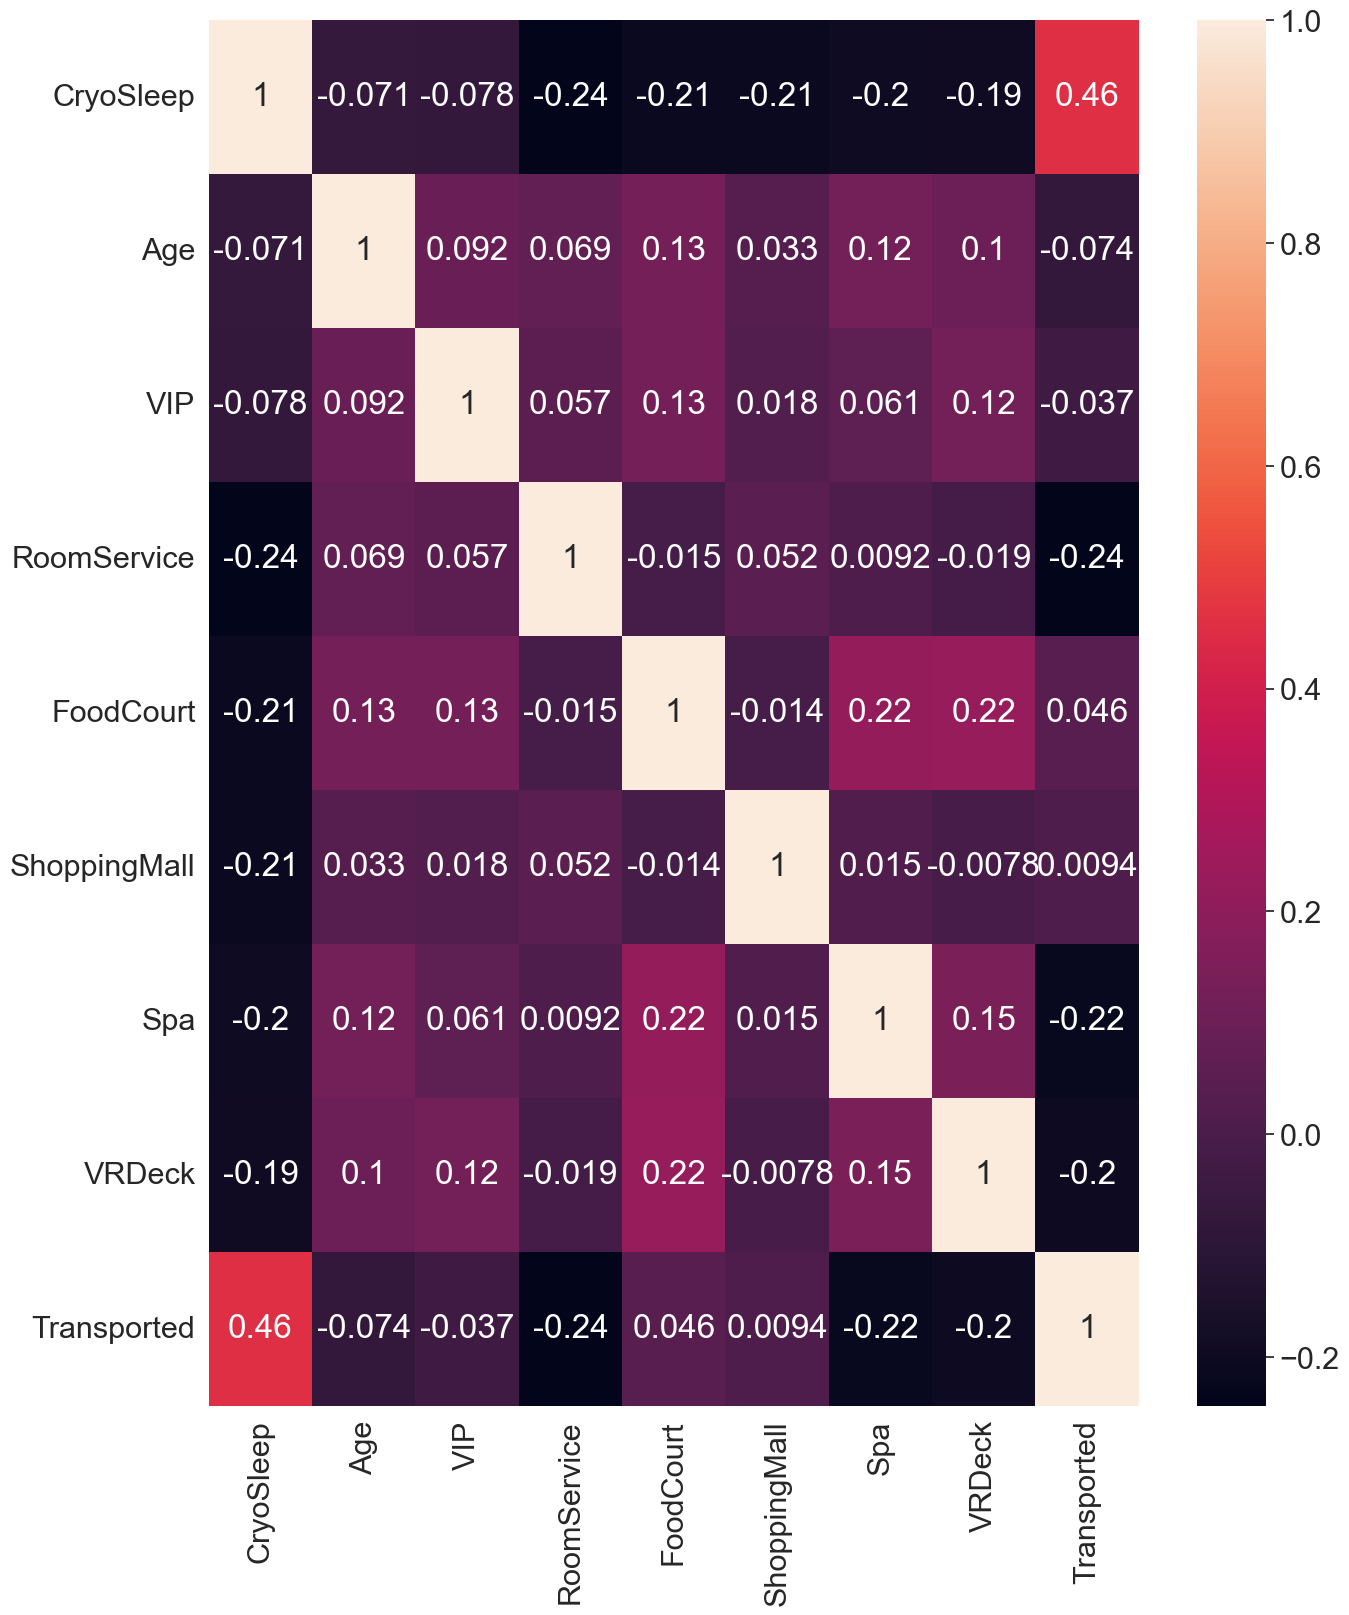

In [14]:
plt.figure(figsize=(15,18))
sns.heatmap(df_train.corr(numeric_only=True), annot=True);

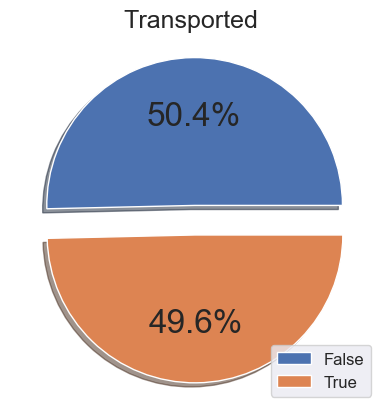

In [56]:
plt.pie(df_train.Transported.value_counts(), shadow=True, explode=[.1,.1], autopct='%.1f%%')
plt.title('Transported ', size=18)
plt.legend(['False', 'True'], loc='best', fontsize=12)
plt.show()

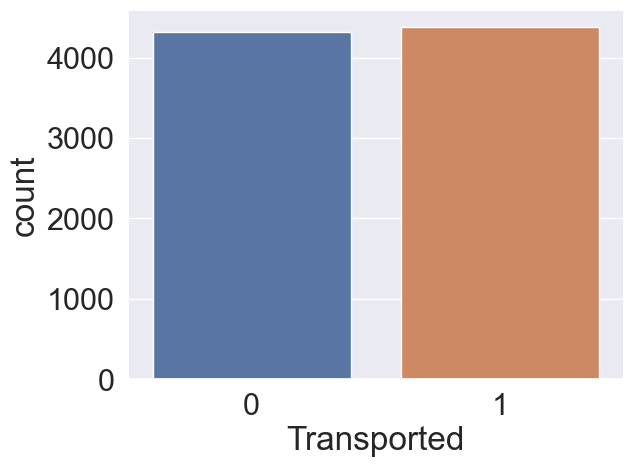

In [57]:
sns.countplot(x = df_train.Transported);

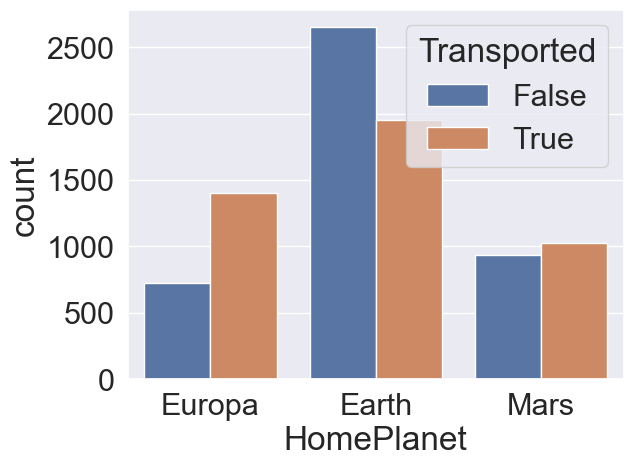

In [17]:
# 변경 되었나 보다 x를 줘야 한다.
# https://seaborn.pydata.org/generated/seaborn.countplot.html

sns.countplot(x = df_train.HomePlanet,hue=df_train.Transported);

# Dude, Europa is gone

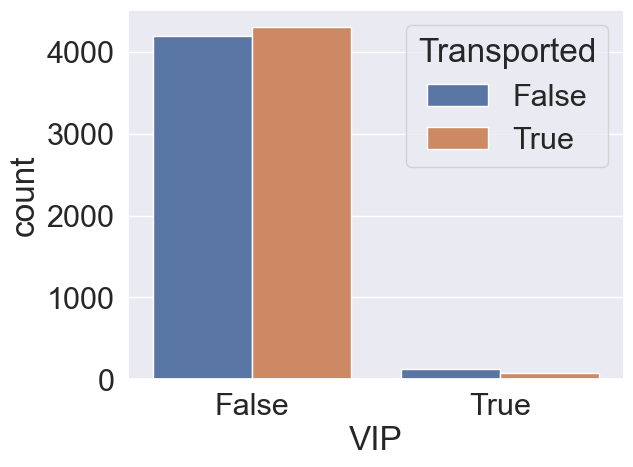

In [18]:
sns.countplot(x=df_train.VIP,hue=df_train.Transported);

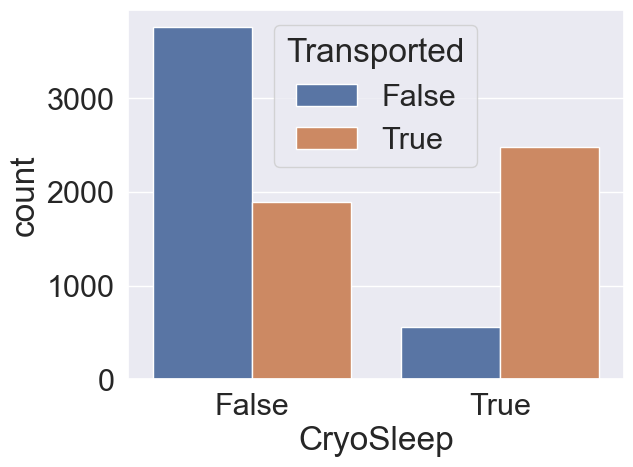

In [19]:
sns.countplot(x = df_train.CryoSleep,hue=df_train.Transported);


**The people in CryoSleep are majorly Transported**


 Do not sleep during travel alright ☠

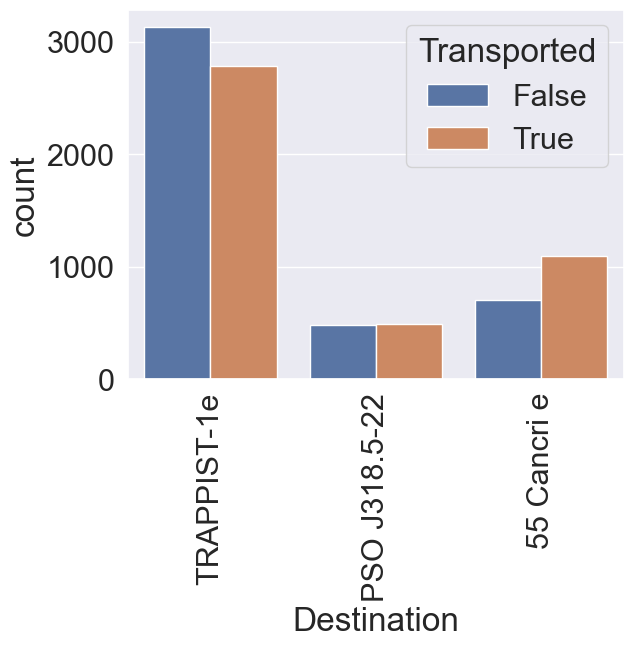

In [20]:
sns.countplot(x = df_train.Destination,hue=df_train.Transported)
plt.xticks(rotation=90);

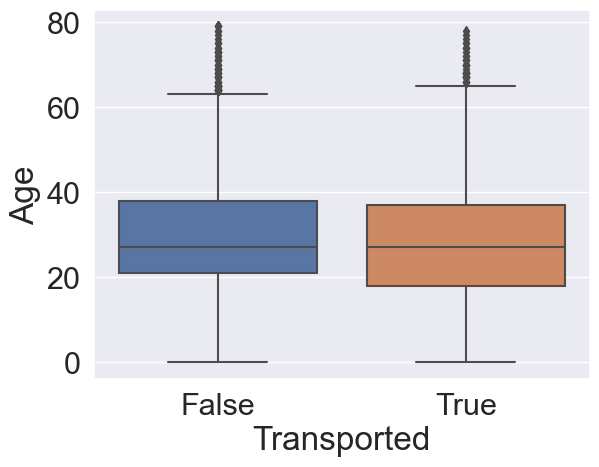

In [21]:
sns.boxplot(y=df_train.Age,x=df_train.Transported);
#Age is not affecting much. But I have a plan XD

### 4.B Splitting Cabin Column ⚔

In [22]:
# Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
df_train[['Deck','Num','Side']] = df_train.Cabin.str.split('/',expand=True)
df_test[['Deck','Num','Side']] = df_test.Cabin.str.split('/',expand=True)

**Let's look into them**

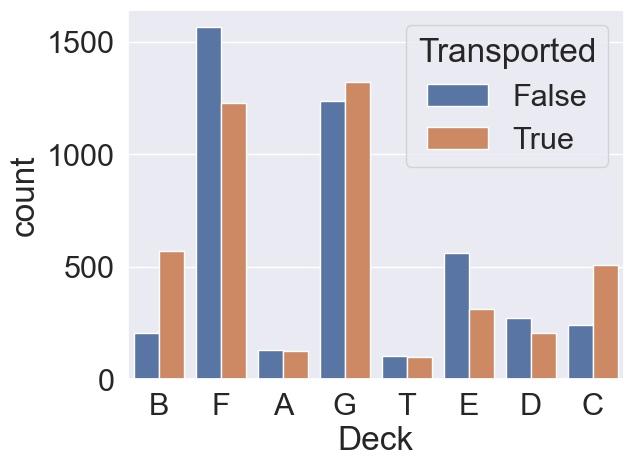

In [23]:
sns.countplot(x = df_train.Deck,hue=df_train.Transported);

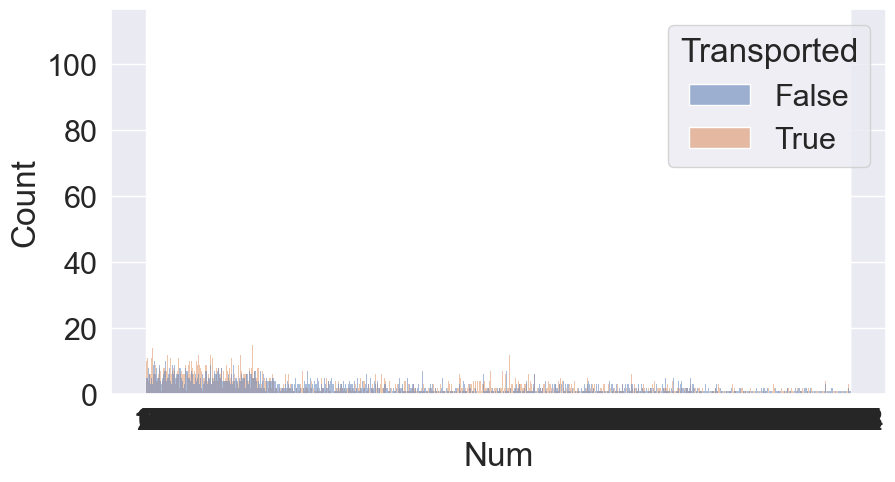

In [24]:
# 시간 오래 걸림
plt.figure(figsize=(10,5))
sns.histplot(data=df_train, x='Num', hue='Transported',bins=14);

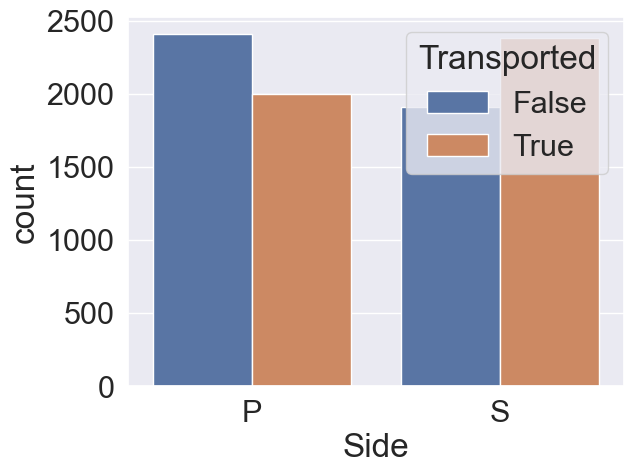

In [25]:
sns.countplot(x = df_train.Side,hue=df_train.Transported);

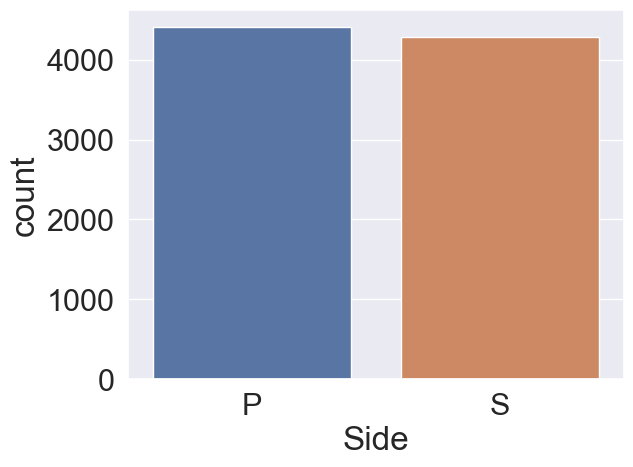

In [26]:
sns.countplot(x = df_test.Side);

# 5.Feature Engineering 🥱

In [27]:
df_train['total_spent']= df_train['RoomService']+ df_train['FoodCourt']+ df_train['ShoppingMall']+ df_train['Spa']+ df_train['VRDeck']
df_test['total_spent']=df_test['RoomService']+df_test['FoodCourt']+df_test['ShoppingMall']+df_test['Spa']+df_test['VRDeck']

In [28]:
df_train['AgeGroup'] = 0
for i in range(6):
    df_train.loc[(df_train.Age >= 10*i) & (df_train.Age < 10*(i + 1)), 'AgeGroup'] = i
# Same for test data
df_test['AgeGroup'] = 0
for i in range(6):
    df_test.loc[(df_test.Age >= 10*i) & (df_test.Age < 10*(i + 1)), 'AgeGroup'] = i

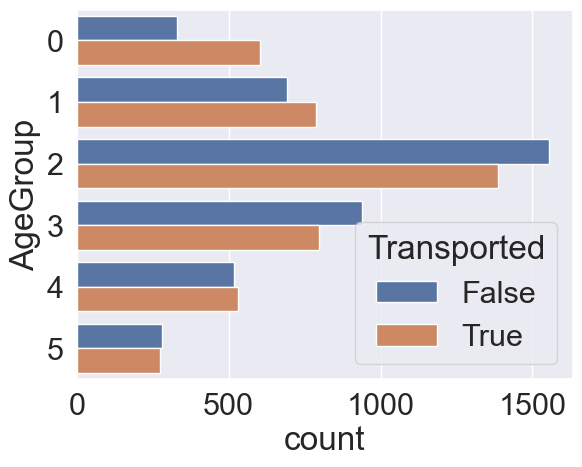

In [29]:
sns.countplot(y=df_train['AgeGroup'],hue=df_train['Transported']);

# 6. Pre processing for Modeling 🤖

### 6.A Encoding

In [30]:
from sklearn.preprocessing import LabelEncoder

categorical_cols= ['HomePlanet','CryoSleep','Destination','VIP','Deck','Side','Num']
for i in categorical_cols:
    print(i)
    le=LabelEncoder()
    arr=np.concatenate((df_train[i], df_test[i])).astype(str)
    le.fit(arr)
    df_train[i]=le.transform(df_train[i].astype(str))
    df_test[i]=le.transform(df_test[i].astype(str))

HomePlanet
CryoSleep
Destination
VIP
Deck
Side
Num


In [31]:
df_train.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Num,Side,total_spent,AgeGroup
PassengerId,,,,,,,,,,,,,,,,,,
0001_01,1,0,B/0/P,2,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1,0,0,0.0,3
0002_01,0,0,F/0/S,2,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,5,0,1,736.0,2
0003_01,1,0,A/0/S,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0,0,1,10383.0,5
0003_02,1,0,A/0/S,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0,0,1,5176.0,3
0004_01,0,0,F/1/S,2,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,5,1,1,1091.0,1


### 6.B Dropping Columns

In [32]:
df_train= df_train.drop(['Name','Cabin'],axis=1)
df_test= df_test.drop(['Name','Cabin'],axis=1)

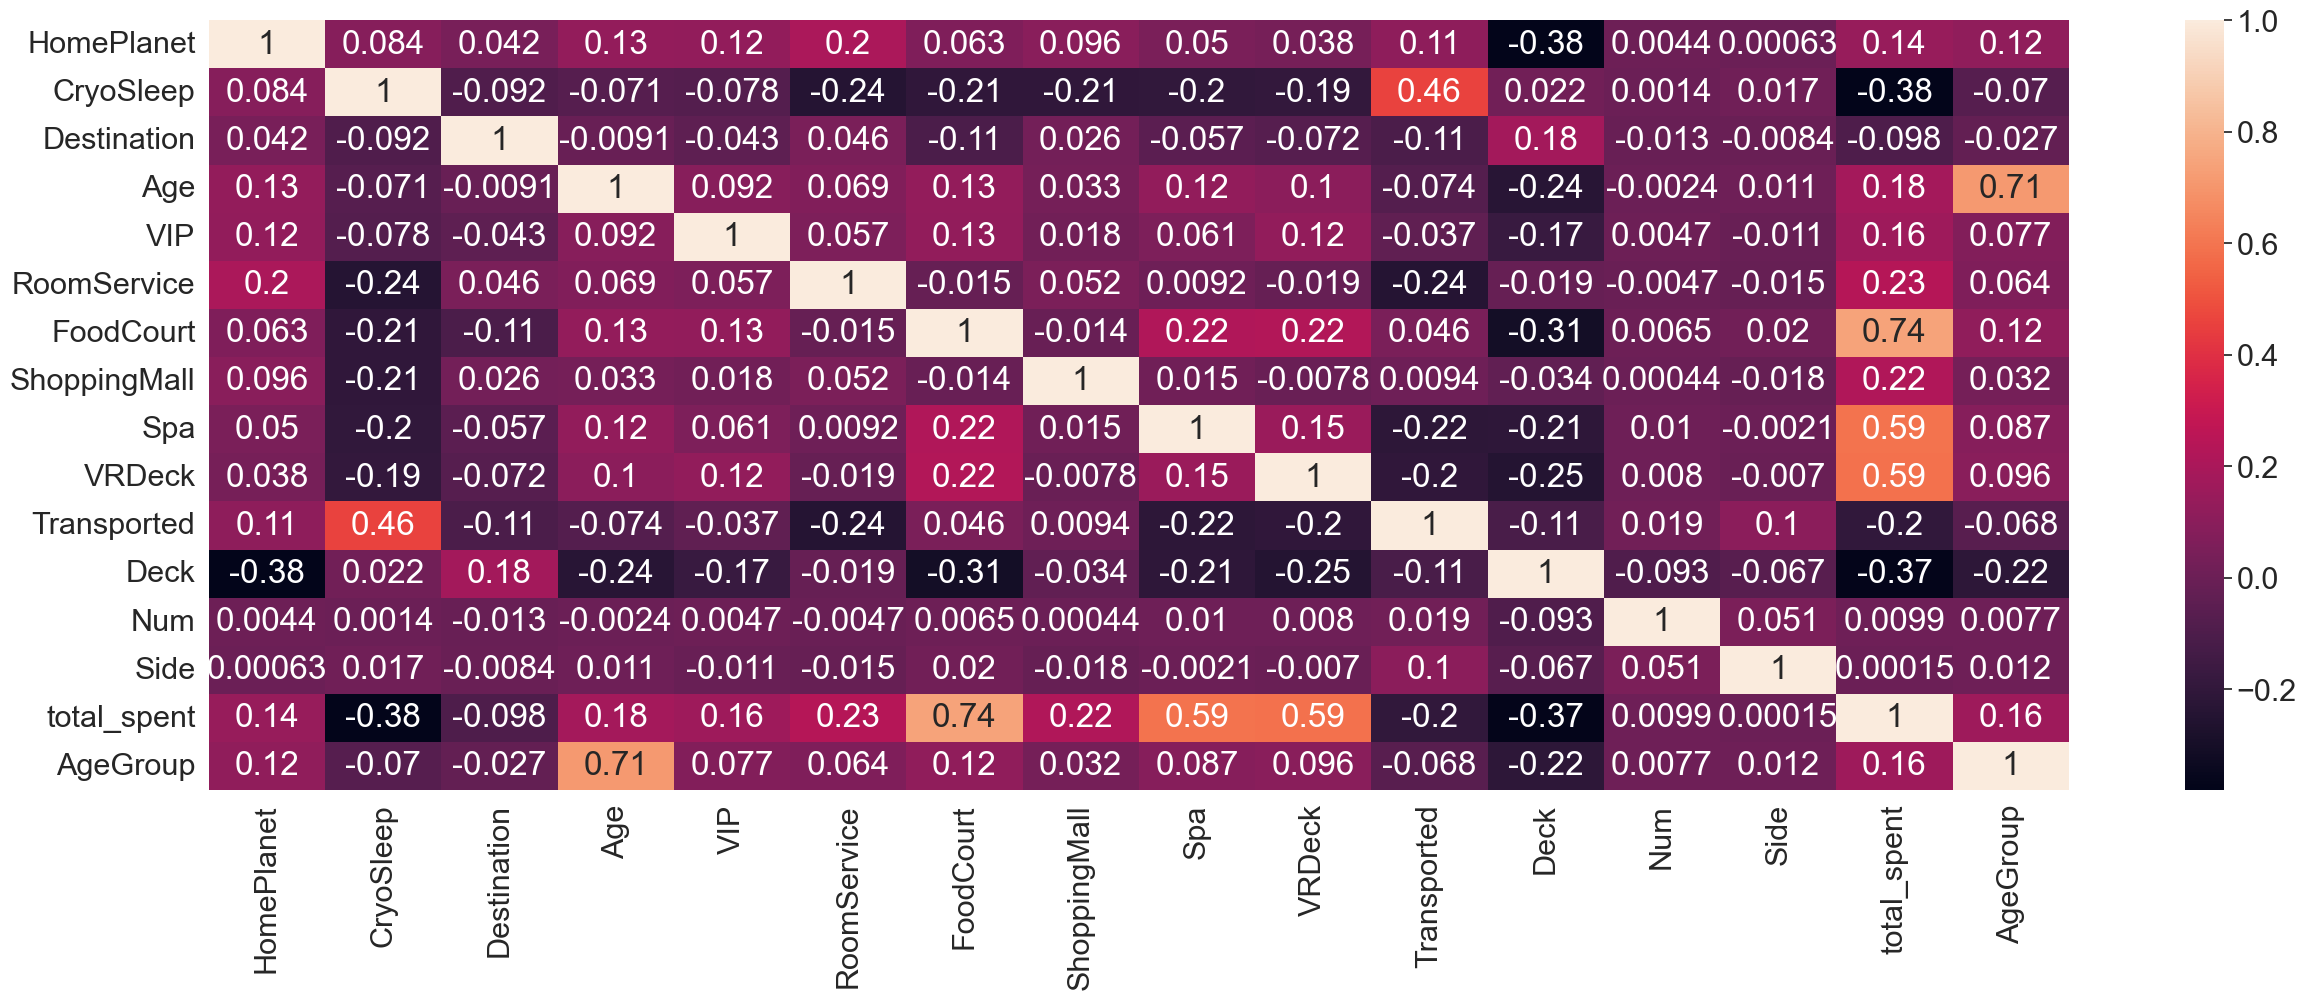

In [33]:
plt.figure(figsize=(30,10))
sns.heatmap(df_train.corr(), annot=True);

In [34]:
df_train['Transported']=df_train['Transported'].replace({True:1,False:0})

In [35]:
X=df_train.drop('Transported',axis=1)
y = df_train['Transported']

In [36]:
X.columns

Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Deck', 'Num', 'Side',
       'total_spent', 'AgeGroup'],
      dtype='object')

### 6.C Splitting Columns

In [37]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=0)

### Modeling - Finally 😎

**Cat Boost 😾**

In [38]:

from catboost import CatBoostClassifier
model=CatBoostClassifier(iterations=1500,
                         eval_metric='Accuracy',
                        verbose=0)

In [39]:
model.fit(X_train,y_train)

In [40]:
pred_y=model.predict(X_val)

pred=model.predict(X_train)
    
print(accuracy_score(y_train.values,pred))
print(accuracy_score(y_val.values,pred_y))

0.8792759625709464
0.8104875804967802


In [41]:
from sklearn.model_selection import GridSearchCV
gcv=GridSearchCV(CatBoostClassifier(),param_grid={'iterations': range(200,2000,200), 'eval_metric': ['Accuracy'],'verbose':[0]},cv=3)
gcv.fit(X_train,y_train)
pred_y=gcv.predict(X_val)

pred=gcv.predict(X_train)
    
print(accuracy_score(y_train.values,pred))
print(accuracy_score(y_val.values,pred_y))

0.8798895536125173
0.8114075436982521


**Gradient Boosting**

In [42]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier(random_state=1,n_estimators=250,learning_rate=0.15,max_depth=3)
gb.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.15, n_estimators=250, random_state=1)

In [43]:
pred_y=gb.predict(X_val)
pred=gb.predict(X_train)
    
print(accuracy_score(y_train.values,pred))
print(accuracy_score(y_val.values,pred_y))

0.8665439484583525
0.8031278748850046


### Cat wins!!! 😼

In [44]:
# lets re fit the model on the entire data
gcv.fit(X,y)

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostClassifier object at 0x17558a380>,
             param_grid={'eval_metric': ['Accuracy'],
                         'iterations': range(200, 2000, 200), 'verbose': [0]})

In [45]:
#for i,z in zip(X.columns,gcv.get_feature_importance()):
    #print('importance of',i,'is',z)


# 7. Prediction and Submission 😎

In [46]:
y_pred = gcv.predict(df_test)

sub=pd.DataFrame({'Transported':y_pred.astype(bool)},index=df_test.index)

sub.head()

,Transported
PassengerId,
0001_01,False
0002_01,True
0003_01,False
0003_02,False
0004_01,True


In [47]:
sub.to_csv('submission')

### <center>Thanks for reading:)</center>
### <center>Upvote! and Leave some suggestions</center>


In [48]:
140/24458100

5.724075050801166e-06